In [4]:

import os
os.environ["KMP_DUPLICATE_LIB_OK"] = "TRUE"
import shutil
from collections import OrderedDict
import subprocess
import json
import matplotlib.pyplot as plt
import nibabel as nib

import numpy as np
import torch
torch.set_num_threads(1)

import nnunetv2
import pandas as pd
import seaborn as sns

#import statsmodels.api as sm
#from statsmodels.stats.power import TTestIndPower
import csv
import re

ModuleNotFoundError: No module named 'openpyxl'

In [9]:
meta_data = pd.read_csv(r"C:\Users\paula\PycharmProjects\STT_classification\Segmentation\nnUNetFrame\RawData\PublicData\metadata.csv")

In [10]:
meta_data.head()

,Series UID,Collection,3rd Party Analysis,Data Description URI,Subject ID,Study UID,Study Description,Study Date,Series Description,Manufacturer,Modality,SOP Class Name,SOP Class UID,Number of Images,File Size,File Location,Download Timestamp
0,1.3.6.1.4.1.14519.5.2.1.5168.1900.103003228939...,Soft-tissue-Sarcoma,NaN,https://doi.org/10.7937/K9/TCIA.2015.7GO2GSKS,STS_002,1.3.6.1.4.1.14519.5.2.1.5168.1900.301696644941...,L-SPINE,01-03-2006,AXT1,Philips Medical Systems,MR,MR Image Storage,1.2.840.10008.5.1.4.1.1.4,27,2.77 MB,.\Soft-tissue-Sarcoma\STS_002\01-03-2006-NA-L-...,2025-03-19T17:13:41.219
1,1.3.6.1.4.1.14519.5.2.1.5168.1900.267475167888...,Soft-tissue-Sarcoma,NaN,https://doi.org/10.7937/K9/TCIA.2015.7GO2GSKS,STS_001,1.3.6.1.4.1.14519.5.2.1.5168.1900.288970202012...,THIGH,09-03-2000,AXIAL SE T2 FAT SAT - RESEARCH,SIEMENS,MR,MR Image Storage,1.2.840.10008.5.1.4.1.1.4,40,11.89 MB,.\Soft-tissue-Sarcoma\STS_001\09-03-2000-NA-TH...,2025-03-19T17:13:42.838
2,1.3.6.1.4.1.14519.5.2.1.5168.1900.377821780061...,Soft-tissue-Sarcoma,NaN,https://doi.org/10.7937/K9/TCIA.2015.7GO2GSKS,STS_002,1.3.6.1.4.1.14519.5.2.1.5168.1900.301696644941...,L-SPINE,01-03-2006,STIR longTE AX,Philips Medical Systems,MR,MR Image Storage,1.2.840.10008.5.1.4.1.1.4,18,4.11 MB,.\Soft-tissue-Sarcoma\STS_002\01-03-2006-NA-L-...,2025-03-19T17:13:45.32
3,1.3.6.1.4.1.14519.5.2.1.5168.1900.900154069973...,Soft-tissue-Sarcoma,NaN,https://doi.org/10.7937/K9/TCIA.2015.7GO2GSKS,STS_003,1.3.6.1.4.1.14519.5.2.1.5168.1900.141476737507...,MRI PELVIS C- C,03-30-2005,AX T1,GE MEDICAL SYSTEMS,MR,MR Image Storage,1.2.840.10008.5.1.4.1.1.4,36,18.96 MB,.\Soft-tissue-Sarcoma\STS_003\03-30-2005-NA-MR...,2025-03-19T17:13:53.379
4,1.3.6.1.4.1.14519.5.2.1.5168.1900.277829078269...,Soft-tissue-Sarcoma,NaN,https://doi.org/10.7937/K9/TCIA.2015.7GO2GSKS,STS_003,1.3.6.1.4.1.14519.5.2.1.5168.1900.141476737507...,MRI PELVIS C- C,03-30-2005,AX STIR,GE MEDICAL SYSTEMS,MR,MR Image Storage,1.2.840.10008.5.1.4.1.1.4,36,18.96 MB,.\Soft-tissue-Sarcoma\STS_003\03-30-2005-NA-MR...,2025-03-19T17:13:54.944


In [17]:
relevant_data = meta_data[["Subject ID", "Study Description", "Series Description", "Modality"]]
relevant_data = relevant_data.sort_values(by=["Subject ID"])
relevant_data.head(51)

,Subject ID,Study Description,Series Description,Modality
1,STS_001,THIGH,AXIAL SE T2 FAT SAT - RESEARCH,MR
7,STS_001,THIGH,AXIAL SE T1 - RESEARCH,MR
0,STS_002,L-SPINE,AXT1,MR
2,STS_002,L-SPINE,STIR longTE AX,MR
3,STS_003,MRI PELVIS C- C,AX T1,MR
4,STS_003,MRI PELVIS C- C,AX STIR,MR
5,STS_004,RIGHT THIGH C,T2ST RT - RESEARCH,MR
6,STS_004,RIGHT THIGH C,T1 RT - RESEARCH,MR
10,STS_005,IRM BRAS GAUCHE C-C,AXIALT1,MR
11,STS_005,IRM BRAS GAUCHE C-C,AXIALT2 FSE FS,MR


In [19]:
tabular_data = pd.read_excel(r"C:\Users\paula\PycharmProjects\STT_classification\Segmentation\nnUNetFrame\RawData\PublicData\tabular_data.xlsx")

In [20]:
tabular_data.head(51)

,Patient ID,Age,Sex,Histological type,MSKCC type,Site of primary STS,Grade,Time – diagnosis to MRI scan (days),Time – MRI scan to PET scan (days),Treatment,"Outcome (recurrence, mets)",Time – diagnosis to outcome (days),"Status (NED, AWD, D)",Time – diagnosis to last follow-up (days)
0,STS_001,59.0,Male,pleiomorphic liposarcoma,Liposarcoma,left thigh,High,-7.0,4.0,Radiotherapy + Surgery + Chemotherapy,Mets – arms,266,D,845.0
1,STS_002,61.0,Male,pleiomorphic leiomyosarcoma,Leiomyosarcoma,left buttock,High,-10.0,25.0,Radiotherapy + Surgery,--,--,NED,501.0
2,STS_003,17.0,Female,epithelioid sarcoma,Other,right buttock,Intermediate,-13.0,15.0,Radiotherapy + Surgery,--,--,NED,756.0
3,STS_004,22.0,Female,malignant fibrous histiocytoma,MFH,right thigh,Low,-6.0,22.0,Radiotherapy + Surgery,--,--,NED,1792.0
4,STS_005,83.0,Female,pleiomorphic leiomyosarcoma,Leiomyosarcoma,left biceps,High,-24.0,34.0,Radiotherapy + Surgery,--,--,NED,647.0
5,STS_006,64.0,Male,extraskeletal osteosarcoma,Extraskeletal bone sarcoma,right thigh,High,-5.0,16.0,Radiotherapy + Surgery + Chemotherapy,Mets – lungs,198,AWD,592.0
6,STS_007,60.0,Female,spindle cell suggestive of myxofibrosarcoma,MFH,right buttock,Intermediate,30.0,-14.0,Radiotherapy + Surgery,Mets – bones,251,D,686.0
7,STS_008,28.0,Female,malignant fibrous histiocytoma,MFH,left arm,Low,-75.0,28.0,Surgery + Chemotherapy,--,--,NED,1153.0
8,STS_009,60.0,Male,myxofibrosarcoma - undifferentiated,MFH,right thigh,High,6.0,20.0,Radiotherapy + Surgery + Chemotherapy,Mets – lungs,101,D,257.0
9,STS_010,60.0,Female,myxofibrosarcoma,MFH,left calf,High,-19.0,18.0,Radiotherapy + Surgery,--,--,NED,790.0


In [25]:
type_counts = tabular_data['MSKCC type'].value_counts()
print(type_counts)

MSKCC type
MFH                           17
Liposarcoma                   11
Leiomyosarcoma                10
Synovial sarcoma               5
Extraskeletal bone sarcoma     4
Other                          3
Fibrosarcoma                   1
Name: count, dtype: int64


In [35]:
tabular_data['Histological type'].value_counts()

Histological type
pleiomorphic leiomyosarcoma                             6
pleiomorphic liposarcoma                                3
malignant fibrous histiocytoma                          3
synovial sarcoma                                        3
leiomyosarcoma                                          3
myxofibrosarcoma                                        3
extraskeletal osteosarcoma                              2
mixoid liposarcoma                                      2
undifferentiated – high grade                           2
liposarcoma                                             2
undifferentiated - pleiomorphic                         2
myxofibrosarcoma - undifferentiated                     1
spindle cell suggestive of myxofibrosarcoma             1
epithelioid sarcoma                                     1
malignant solitary fibrous tumor                        1
extraskeletal Ewing                                     1
spindle cell suggestive of pleomorphic liposarcoma    

In [36]:
tabular_data['Site of primary STS'].value_counts()

Site of primary STS
left thigh              17
right thigh             11
right buttock            5
right calf               3
left calf                2
right quadricep          2
left arm                 1
left biceps              1
left buttock             1
right hand               1
left pelvis              1
right groin              1
right parascapusular     1
parascapusular           1
left knee                1
left adductur            1
left poplietal fossa     1
Name: count, dtype: int64

In [44]:
# Convert Series to DataFrame and reset index
type_counts = type_counts.reset_index()
type_counts.columns = ["Subtype", "Count"]  # Rename columns

# Sort values in descending order
type_counts = type_counts.sort_values(by="Count", ascending=False)

ValueError: Length mismatch: Expected axis has 4 elements, new values have 2 elements

C:\Users\paula\AppData\Local\Temp\ipykernel_23340\1089325559.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Count", y="Subtype", data=type_counts, palette="viridis")


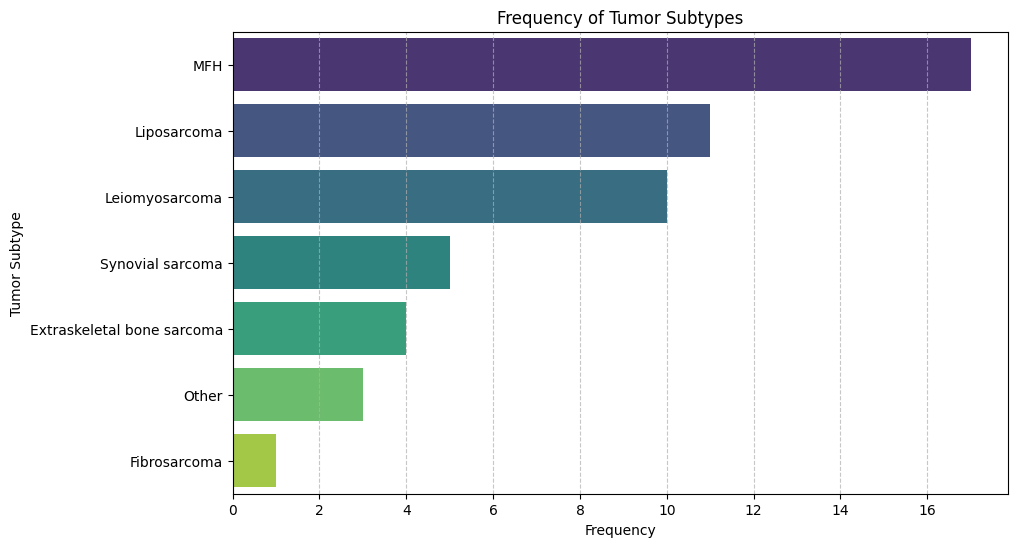

In [34]:
plt.figure(figsize=(10, 6))
sns.barplot(x="Count", y="Subtype", data=type_counts, palette="viridis")

# Labels and title
plt.xlabel("Frequency")
plt.ylabel("Tumor Subtype")
plt.title("Frequency of Tumor Subtypes")
plt.grid(axis="x", linestyle="--", alpha=0.7)

# Show plot
plt.show()

In [40]:
#encode cat variable into numerical, one hot encode
tabular_data_encoded = pd.get_dummies(tabular_data[['Histological type', 'Site of primary STS']])

correlation = tabular_data_encoded.corr().iloc[0, 1]  #
print("Correlation:", correlation)

Correlation: 0.36345384101630057


In [39]:
tabular_data['Histological type'].corr(tabular_data['Site of primary STS'])

np.float64(0.3634538410163007)

In [43]:
#I am assuming a medium effect size, but this needs to be checked!
#alpha: significance level
#power: prob of detecting a true effect
#for effect size = 0.5, sample size is 63.77
analysis = TTestIndPower()
required_sample_size = analysis.solve_power(effect_size=0.5, alpha=0.05, power=0.8, alternative='two-sided')
print(required_sample_size)

63.765610587854006


In [45]:
base_path = "C:\\Users\\paula\\PycharmProjects\\STT_classification\\Segmentation\\nnUNetFrame\\RawData\\PublicData\\Soft-tissue-Sarcoma"

output_csv = "filename_mapping.csv"


In [136]:
def create_filename_mapping(patient):
    #print(patient)
    mappings = [] #patient, original filename, new filename
    #root is patient dir
    patient_dir = os.path.join(base_path, patient)
    for root, dirs, files in os.walk(patient_dir):
        #print(root)
        mr_dirs = []
        for dir in dirs:
            #print(f"Checking dir: {dir}")
            match = re.match(r'\d+\.\d+-([A-Za-z0-9\s]+?)(?:\s*- RESEARCH)?-\d+', dir)
            if match:
                print(match.group(1))

                # Extract the MR type part
                full_path = os.path.join(root, dir)
                print(full_path)
                mr_dirs.append((match.group(1), full_path))
                #print(match.group(1))
                #mappings.append((patient,match.group(1),dir))
        # Ensure T1 is first, other image second
        mr_dirs.sort(key=lambda x: ("T1" not in x[0], x[0]))

        for idx, (mr_type, orig_mr_dir) in enumerate(mr_dirs):
            new_mr_dir = f"{patient}_{idx:04d}"
            if idx == 0:
                T1 = 1
            else:
                T1 = 0
            mappings.append([patient,mr_type, orig_mr_dir, T1, new_mr_dir])

    return mappings



In [120]:
patient_list = [d for d in os.listdir(base_path) if os.path.isdir(os.path.join(base_path, d))]
print(patient_list)


['STS_001', 'STS_002', 'STS_003', 'STS_004', 'STS_005', 'STS_006', 'STS_007', 'STS_008', 'STS_009', 'STS_010', 'STS_011', 'STS_012', 'STS_013', 'STS_014', 'STS_015', 'STS_016', 'STS_017', 'STS_018', 'STS_019', 'STS_020', 'STS_021', 'STS_022', 'STS_023', 'STS_024', 'STS_025', 'STS_026', 'STS_027', 'STS_028', 'STS_029']


In [137]:
mappings =[]
csv_path = os.path.join(base_path, output_csv)
with open(csv_path, mode="w", newline="") as file:
    writer = csv.writer(file)
    writer.writerow(["Patient ID", "Original MR Dir", "Subtype", "T1", "New MR Dir"])
    for patient in patient_list:
        patient_mapping = create_filename_mapping(patient)
        writer.writerows(patient_mapping)


In [132]:
file_mapping = pd.read_csv(csv_path)
x = file_mapping[["Patient ID", "T1", "New MR Dir"]]
x.head()

,Patient ID,T1,New MR Dir


In [133]:
file_mapping.head()

,Patient ID,Original MR Dir,Subtype,T1,New MR Dir


In [104]:
def rename_images(csv_file, base_path, target_dir):

    reader = csv.reader(csv_file)
    header = next(csv_file)

    for row in reader:
            patient = row[0]   # Patient name (e.g., STS_001)
            original_dir = row[1]  # Original MR directory name
            new_dir = row[3]

            patient_dir = os.path.join(base_path, patient)

            # Walk through the patient directory and subdirectories
            for root, dirs, files in os.walk(patient_dir):
                if original_dir in dirs:  # Check if the directory exists
                    original_path = os.path.join(root, original_dir)
                    new_path = os.path.join(root, new_dir)

                    # Rename and move
                    print(f"Renaming {original_path} to {new_path}")
                    os.rename(original_path, new_path)

                    # Now move the renamed directory to the new target directory
                    print(f"Moving {new_path} to {target_dir}")
                    shutil.move(new_path, os.path.join(target_dir, new_dir))
                    break  # Once the directory is found, stop further searching

                else:
                    print(f"Warning: {original_dir} not found in {root}, skipping.")

In [105]:
target_directory = "C:\\Users\\paula\\PycharmProjects\\STT_classification\\Segmentation\\nnUNetFrame\\RawData\\PublicData"

with open(csv_path, mode="r") as file:
    rename_images(file, base_path, target_directory)

Renaming C:\Users\paula\PycharmProjects\STT_classification\Segmentation\nnUNetFrame\RawData\PublicData\Soft-tissue-Sarcoma\STS_001\09-03-2000-NA-THIGH-48623\11.000000-AXIAL SE T1 - RESEARCH-12555 to C:\Users\paula\PycharmProjects\STT_classification\Segmentation\nnUNetFrame\RawData\PublicData\Soft-tissue-Sarcoma\STS_001\09-03-2000-NA-THIGH-48623\STS_001_0000
Moving C:\Users\paula\PycharmProjects\STT_classification\Segmentation\nnUNetFrame\RawData\PublicData\Soft-tissue-Sarcoma\STS_001\09-03-2000-NA-THIGH-48623\STS_001_0000 to C:\Users\paula\PycharmProjects\STT_classification\Segmentation\nnUNetFrame\RawData\PublicData
Renaming C:\Users\paula\PycharmProjects\STT_classification\Segmentation\nnUNetFrame\RawData\PublicData\Soft-tissue-Sarcoma\STS_001\09-03-2000-NA-THIGH-48623\10.000000-AXIAL SE T2 FAT SAT - RESEARCH-62438 to C:\Users\paula\PycharmProjects\STT_classification\Segmentation\nnUNetFrame\RawData\PublicData\Soft-tissue-Sarcoma\STS_001\09-03-2000-NA-THIGH-48623\STS_001_0001
Moving 